In [188]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import OrdinalEncoder

In [189]:
iphones_df = pd.read_csv('../notebooks/iphones_dataframe.csv')

In [190]:
iphones_df.head()

,Unnamed: 0,title,price,num_sold,shipping_type,condition,condition_description,num_reviews,pos_feedback_pct,return_days
0,0,apple iphone 7 plus (excellent condition) fact...,237.99,19 sold,free 4 day shipping,used,“fully functional in excellent condition. our ...,30470.0,99.9,30 days returns
1,1,apple iphone 8 64gb gsm factory unlocked gray ...,149.99,"2,313 sold",free 2 day shipping,good - refurbished,“good overall condition. may have some minor s...,2703.0,97.2,30 days returns
2,2,apple iphone 8 64gb gsm factory unlocked smart...,149.99,"2,419 sold",free 3 day shipping,used,“overall good condition will have marks and sc...,13103.0,96.3,30 days returns
3,3,apple iphone 7 32gb gsm factory unlocked 4g lt...,107.99,"6,010 sold",free 3 day shipping,used,“overall good working condition and will have ...,13103.0,96.3,30 days returns
4,4,apple iphone x 64gb factory unlocked phone - v...,209.95,"22,036 sold",free 4 day shipping,very good - refurbished,"“this is a b+ stock item, meaning unit is in v...",332288.0,98.4,60 days returns


In [191]:
iphones_df['model'] = iphones_df['title'].str.extract(r'iphone ([^ \-+/,p]*)')
iphones_df['capacity'] = iphones_df['title'].str.extract(r' (\d+)[ ]?gb+.*$').dropna().astype(int)

In [192]:
iphones_df

,Unnamed: 0,title,price,num_sold,shipping_type,condition,condition_description,num_reviews,pos_feedback_pct,return_days,model,capacity
0,0,apple iphone 7 plus (excellent condition) fact...,237.99,19 sold,free 4 day shipping,used,“fully functional in excellent condition. our ...,30470.0,99.9,30 days returns,7,NaN
1,1,apple iphone 8 64gb gsm factory unlocked gray ...,149.99,"2,313 sold",free 2 day shipping,good - refurbished,“good overall condition. may have some minor s...,2703.0,97.2,30 days returns,8,64.0
2,2,apple iphone 8 64gb gsm factory unlocked smart...,149.99,"2,419 sold",free 3 day shipping,used,“overall good condition will have marks and sc...,13103.0,96.3,30 days returns,8,64.0
3,3,apple iphone 7 32gb gsm factory unlocked 4g lt...,107.99,"6,010 sold",free 3 day shipping,used,“overall good working condition and will have ...,13103.0,96.3,30 days returns,7,32.0
4,4,apple iphone x 64gb factory unlocked phone - v...,209.95,"22,036 sold",free 4 day shipping,very good - refurbished,"“this is a b+ stock item, meaning unit is in v...",332288.0,98.4,60 days returns,x,64.0
...,...,...,...,...,...,...,...,...,...,...,...,...
7440,7440,apple iphone 6 16gb gsm unlocked a1549 smartph...,119.95,NaN,free 4 day shipping,used,“iphone is in excellent condition. comes with...,2116.0,100.0,30 days returns,6,16.0
7441,7441,apple iphone 4 - 8gb - black (at&t) a1332 (gsm),8.60,NaN,NaN,for parts or not working,NaN,87.0,96.8,Seller does not accept returns,4,8.0
7442,7442,apple iphone 6 plus 16gb silver a1522 (sprint ...,62.97,NaN,NaN,used,“fully working (minor issues)\nfully working w...,136775.0,98.8,30 days returns,6,16.0
7443,7443,apple iphone 6 128gb unlocked -excellent condi...,99.00,NaN,NaN,used,“excellent”,884.0,100.0,30 days returns,6,128.0


In [193]:
# View average capacity for each model
iphones_df.groupby('model').mean()

,Unnamed: 0,price,num_reviews,pos_feedback_pct,capacity
model,,,,,
,4843.673684,27.935106,1390.126316,98.156842,16.000000
10,518.500000,9.470000,1110.500000,90.900000,NaN
11,3040.184489,300.118313,119170.482961,98.502994,124.438061
11.64,3596.000000,405.000000,5439.000000,99.400000,256.000000
12,2605.464380,561.743657,296251.158311,99.069837,138.766355
...,...,...,...,...,...
x,2917.728571,175.916473,129947.960714,98.165091,140.521739
xr,3476.181529,202.771834,90269.557325,98.405519,89.749469
xs,3344.054004,206.484377,90057.201117,98.201695,177.842424


In [194]:
# Fill NaNs in capacity with mean capacity for each model
iphones_df['capacity'] = iphones_df['capacity'].fillna(iphones_df.groupby('model')['capacity'].transform('mean'))

In [195]:
iphones_df.isna().sum()

Unnamed: 0                  0
title                      15
price                     233
num_sold                 6369
shipping_type            4505
condition                  15
condition_description    3452
num_reviews                16
pos_feedback_pct          146
return_days                15
model                      65
capacity                  166
dtype: int64

In [196]:
iphones_df['return_days'].value_counts()

30 days returns                   3910
60 days returns                   1966
Seller does not accept returns    1509
14 days returns                     45
Name: return_days, dtype: int64

In [197]:
return_dict = {
    'Seller does not accept returns': 0,
    '14 days returns': 1,
    '30 days returns': 2,
    '60 days returns': 3
}

iphones_df['return_days'] = iphones_df['return_days'].map(return_dict)

In [198]:
iphones_df['condition'].value_counts()

used                        2861
new                         2109
for parts or not working     914
good - refurbished           444
very good - refurbished      389
open box                     371
excellent - refurbished      342
Name: condition, dtype: int64

In [199]:
condition_dict = {
    'for parts or not working': 0,
    'used': 1,
    'good - refurbished': 2,
    'very good - refurbished': 3,
    'excellent - refurbished': 4,
    'open box': 5,
    'new': 6
}
iphones_df['condition'] = iphones_df['condition'].map(condition_dict)

In [200]:
release_years = {
    '2g':2008,
    '3g': 2009,
    '4g': 2010,
    '4s': 2011,
    '5': 2012,
    '5c': 2013,
    '5s': 2013,
    '6': 2014, 
    '6s': 2015,
    'se': 2016,
    '7': 2016,
    '8': 2017, 
    'x': 2017,
    'xr': 2018,
    'xs': 2018,
    '11': 2019,
    '12': 2020,
    '13': 2021
}
# Filter for iphone models only, get rid of lots and non-iphones
iphones_df = iphones_df[iphones_df['model'].isin(release_years)]

iphones_df['release_year'] = iphones_df['model'].apply(lambda x: release_years[x])


/var/folders/q_/g2zssbt10h1blxnpvcp374lw0000gn/T/ipykernel_10891/146278888.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iphones_df['release_year'] = iphones_df['model'].apply(lambda x: release_years[x])


In [201]:
models_dict = {
    '2g':0,
    '3g': 1,
    '4g': 2,
    '4s': 3,
    '5': 4,
    '5c': 5,
    '5s': 6,
    '6': 7, 
    '6s': 8,
    'se': 9,
    '7': 10,
    '8': 11, 
    'x': 12,
    'xr': 13,
    'xs': 14,
    '11': 15,
    '12': 16,
    '13': 17
    }
iphones_df['model'] = iphones_df['model'].map(models_dict)

/var/folders/q_/g2zssbt10h1blxnpvcp374lw0000gn/T/ipykernel_10891/3837953388.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iphones_df['model'] = iphones_df['model'].map(models_dict)


In [202]:
iphones_df['release_year'].value_counts()

2017    1241
2016    1210
2018    1165
2019     851
2014     761
2015     583
2021     509
2020     379
2013     213
2012      97
2011      49
2009       4
Name: release_year, dtype: int64

In [203]:
iphones_df.describe()

,Unnamed: 0,price,condition,num_reviews,pos_feedback_pct,return_days,model,capacity,release_year
count,7062.000000,6851.000000,7062.000000,7.061000e+03,6936.000000,7062.000000,7062.000000,7062.000000,7062.000000
mean,3669.518125,197.679115,2.764514,9.072996e+04,98.523342,1.868309,11.417587,97.311241,2016.960068
std,2153.156387,200.958002,2.309607,4.304729e+05,2.598032,1.026040,3.396549,81.378357,2.205834
min,0.000000,1.000000,0.000000,-1.000000e+00,50.000000,0.000000,1.000000,0.000000,2009.000000
25%,1791.250000,39.990000,1.000000,5.310000e+02,98.200000,2.000000,9.000000,64.000000,2016.000000
50%,3652.500000,139.990000,1.000000,2.734000e+03,99.200000,2.000000,11.000000,64.000000,2017.000000
75%,5528.750000,279.990000,6.000000,4.321700e+04,100.000000,3.000000,14.000000,128.000000,2018.000000
max,7444.000000,999.990000,6.000000,3.099332e+06,100.000000,3.000000,17.000000,512.000000,2021.000000


In [204]:
iphones_df = iphones_df.drop(columns=['num_sold', 'shipping_type', 'Unnamed: 0'])

In [205]:
iphones_df.isna().sum()

title                       0
price                     211
condition                   0
condition_description    3162
num_reviews                 1
pos_feedback_pct          126
return_days                 0
model                       0
capacity                    0
release_year                0
dtype: int64

In [206]:
iphones_df.isna().sum()

title                       0
price                     211
condition                   0
condition_description    3162
num_reviews                 1
pos_feedback_pct          126
return_days                 0
model                       0
capacity                    0
release_year                0
dtype: int64

In [207]:
iphones_df['return_days'].value_counts()

2.0    3709
3.0    1912
0.0    1401
1.0      40
Name: return_days, dtype: int64

In [208]:
iphones_df

,title,price,condition,condition_description,num_reviews,pos_feedback_pct,return_days,model,capacity,release_year
0,apple iphone 7 plus (excellent condition) fact...,237.99,1.0,“fully functional in excellent condition. our ...,30470.0,99.9,2.0,10,78.541106,2016
1,apple iphone 8 64gb gsm factory unlocked gray ...,149.99,2.0,“good overall condition. may have some minor s...,2703.0,97.2,2.0,11,64.000000,2017
2,apple iphone 8 64gb gsm factory unlocked smart...,149.99,1.0,“overall good condition will have marks and sc...,13103.0,96.3,2.0,11,64.000000,2017
3,apple iphone 7 32gb gsm factory unlocked 4g lt...,107.99,1.0,“overall good working condition and will have ...,13103.0,96.3,2.0,10,32.000000,2016
4,apple iphone x 64gb factory unlocked phone - v...,209.95,3.0,"“this is a b+ stock item, meaning unit is in v...",332288.0,98.4,3.0,12,64.000000,2017
...,...,...,...,...,...,...,...,...,...,...
7439,apple iphone 6s,75.00,0.0,NaN,168.0,100.0,0.0,8,56.774194,2015
7440,apple iphone 6 16gb gsm unlocked a1549 smartph...,119.95,1.0,“iphone is in excellent condition. comes with...,2116.0,100.0,2.0,7,16.000000,2014
7442,apple iphone 6 plus 16gb silver a1522 (sprint ...,62.97,1.0,“fully working (minor issues)\nfully working w...,136775.0,98.8,2.0,7,16.000000,2014
7443,apple iphone 6 128gb unlocked -excellent condi...,99.00,1.0,“excellent”,884.0,100.0,2.0,7,128.000000,2014


In [209]:
numeric_iphones_cleaned = iphones_df.drop(columns = ['condition_description']).dropna()

In [210]:
nlp_iphones_cleaned = iphones_df.dropna()

In [211]:
nlp_iphones_cleaned

,title,price,condition,condition_description,num_reviews,pos_feedback_pct,return_days,model,capacity,release_year
0,apple iphone 7 plus (excellent condition) fact...,237.99,1.0,“fully functional in excellent condition. our ...,30470.0,99.9,2.0,10,78.541106,2016
1,apple iphone 8 64gb gsm factory unlocked gray ...,149.99,2.0,“good overall condition. may have some minor s...,2703.0,97.2,2.0,11,64.000000,2017
2,apple iphone 8 64gb gsm factory unlocked smart...,149.99,1.0,“overall good condition will have marks and sc...,13103.0,96.3,2.0,11,64.000000,2017
3,apple iphone 7 32gb gsm factory unlocked 4g lt...,107.99,1.0,“overall good working condition and will have ...,13103.0,96.3,2.0,10,32.000000,2016
4,apple iphone x 64gb factory unlocked phone - v...,209.95,3.0,"“this is a b+ stock item, meaning unit is in v...",332288.0,98.4,3.0,12,64.000000,2017
...,...,...,...,...,...,...,...,...,...,...
7437,apple iphone 6 a1549 gold 64gb in box,75.00,1.0,“two fine hairline cracks and a drop crack on ...,71.0,100.0,0.0,7,64.000000,2014
7440,apple iphone 6 16gb gsm unlocked a1549 smartph...,119.95,1.0,“iphone is in excellent condition. comes with...,2116.0,100.0,2.0,7,16.000000,2014
7442,apple iphone 6 plus 16gb silver a1522 (sprint ...,62.97,1.0,“fully working (minor issues)\nfully working w...,136775.0,98.8,2.0,7,16.000000,2014
7443,apple iphone 6 128gb unlocked -excellent condi...,99.00,1.0,“excellent”,884.0,100.0,2.0,7,128.000000,2014


In [212]:
numeric_iphones_cleaned.to_csv('numeric_iphones_cleaned.csv')
nlp_iphones_cleaned.to_csv('nlp_iphones_cleaned.csv')

In [213]:
iphones_df

,title,price,condition,condition_description,num_reviews,pos_feedback_pct,return_days,model,capacity,release_year
0,apple iphone 7 plus (excellent condition) fact...,237.99,1.0,“fully functional in excellent condition. our ...,30470.0,99.9,2.0,10,78.541106,2016
1,apple iphone 8 64gb gsm factory unlocked gray ...,149.99,2.0,“good overall condition. may have some minor s...,2703.0,97.2,2.0,11,64.000000,2017
2,apple iphone 8 64gb gsm factory unlocked smart...,149.99,1.0,“overall good condition will have marks and sc...,13103.0,96.3,2.0,11,64.000000,2017
3,apple iphone 7 32gb gsm factory unlocked 4g lt...,107.99,1.0,“overall good working condition and will have ...,13103.0,96.3,2.0,10,32.000000,2016
4,apple iphone x 64gb factory unlocked phone - v...,209.95,3.0,"“this is a b+ stock item, meaning unit is in v...",332288.0,98.4,3.0,12,64.000000,2017
...,...,...,...,...,...,...,...,...,...,...
7439,apple iphone 6s,75.00,0.0,NaN,168.0,100.0,0.0,8,56.774194,2015
7440,apple iphone 6 16gb gsm unlocked a1549 smartph...,119.95,1.0,“iphone is in excellent condition. comes with...,2116.0,100.0,2.0,7,16.000000,2014
7442,apple iphone 6 plus 16gb silver a1522 (sprint ...,62.97,1.0,“fully working (minor issues)\nfully working w...,136775.0,98.8,2.0,7,16.000000,2014
7443,apple iphone 6 128gb unlocked -excellent condi...,99.00,1.0,“excellent”,884.0,100.0,2.0,7,128.000000,2014


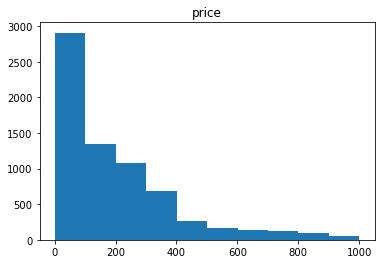

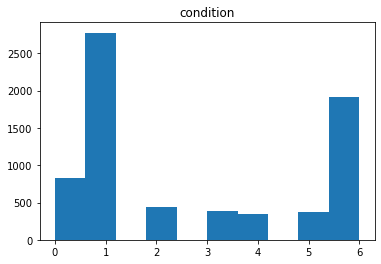

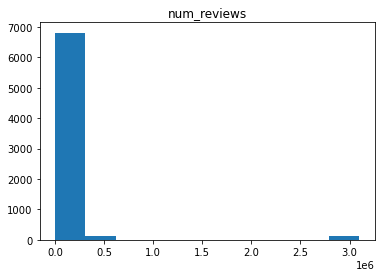

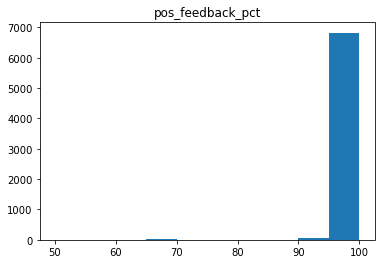

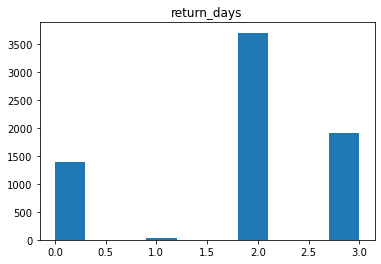

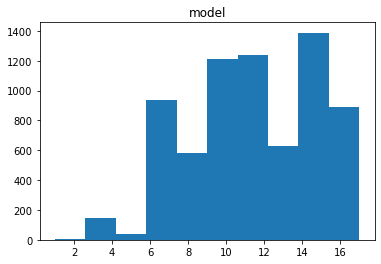

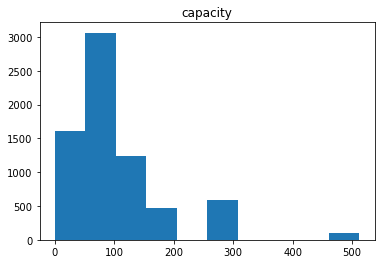

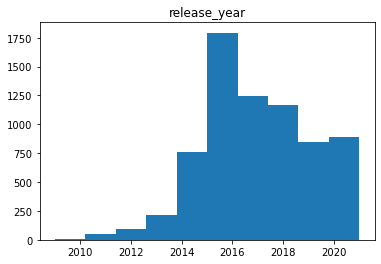

In [214]:
for col in iphones_df.describe().columns:
    plt.hist(iphones_df[col])
    plt.title(col)
    plt.show()
    

In [215]:
iphones_df.describe(include='all')

,title,price,condition,condition_description,num_reviews,pos_feedback_pct,return_days,model,capacity,release_year
count,7062,6851.000000,7062.000000,3900,7.061000e+03,6936.000000,7062.000000,7062.000000,7062.000000,7062.000000
unique,6317,NaN,NaN,2092,NaN,NaN,NaN,NaN,NaN,NaN
top,"iphone 13 pro max 6.7"" case shockproof full-bo...",NaN,NaN,"“note: phone has had basic testing done, see t...",NaN,NaN,NaN,NaN,NaN,NaN
freq,16,NaN,NaN,93,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,197.679115,2.764514,NaN,9.072996e+04,98.523342,1.868309,11.417587,97.311241,2016.960068
std,NaN,200.958002,2.309607,NaN,4.304729e+05,2.598032,1.026040,3.396549,81.378357,2.205834
min,NaN,1.000000,0.000000,NaN,-1.000000e+00,50.000000,0.000000,1.000000,0.000000,2009.000000
25%,NaN,39.990000,1.000000,NaN,5.310000e+02,98.200000,2.000000,9.000000,64.000000,2016.000000
50%,NaN,139.990000,1.000000,NaN,2.734000e+03,99.200000,2.000000,11.000000,64.000000,2017.000000
75%,NaN,279.990000,6.000000,NaN,4.321700e+04,100.000000,3.000000,14.000000,128.000000,2018.000000
